# Условие 1: 
#### Задача 1

---

Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Считываем датасет
df = pd.read_csv('kc_house_data.csv', sep=',')
df.sample(n=10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16548,3222079136,20140818T000000,213000.0,3,1.75,1200,55321,1.5,0,0,...,7,1200,0,1977,0,98010,47.3492,-121.935,1910,54450
9129,5700002510,20140611T000000,1085000.0,5,2.50,2340,6000,2.0,0,0,...,10,2340,0,1922,0,98144,47.5764,-122.287,2350,6000
5789,1624079088,20140811T000000,415000.0,3,2.75,3900,111514,2.0,0,0,...,6,3460,440,1967,2008,98024,47.5621,-121.924,2460,217800
11544,8566100160,20141022T000000,840000.0,5,1.75,2500,11617,1.0,0,0,...,9,1560,940,1966,0,98040,47.5361,-122.217,3370,11617
8538,629811340,20150508T000000,770000.0,4,3.00,2800,9127,2.0,0,0,...,9,2800,0,1999,0,98074,47.6123,-122.007,2780,8165
1157,8069000075,20141229T000000,790000.0,4,1.75,2460,10061,1.0,1,4,...,7,1410,1050,1961,0,98178,47.5105,-122.238,2300,10061
5252,7524400250,20141124T000000,589950.0,3,2.00,2080,12094,2.0,0,0,...,8,2080,0,1982,0,98052,47.7035,-122.164,2230,12204
9122,6623400356,20140702T000000,250000.0,3,1.75,1200,24805,1.0,0,0,...,6,1200,0,1984,0,98031,47.4236,-122.195,2150,4339
13514,423059077,20141223T000000,515000.0,5,1.75,1880,48787,2.0,0,0,...,6,1880,0,1922,0,98059,47.5094,-122.165,1690,8401
5086,5071700020,20140703T000000,240000.0,3,1.75,1570,8750,1.0,0,0,...,7,1570,0,1960,0,98148,47.4425,-122.333,1890,8825


---

1.2 Изучите стоимости недвижимости

---

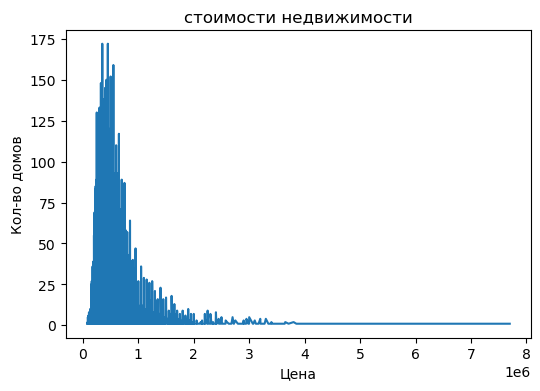

In [2]:
data = df.groupby('price')['price'].agg(count='count').reset_index().sort_values(by='price')

plt.figure(figsize=(6, 4))
plt.plot(data['price'], data['count'])


plt.title('стоимости недвижимости')
plt.xlabel('Цена')
plt.ylabel('Кол-во домов');

# ИЛИ

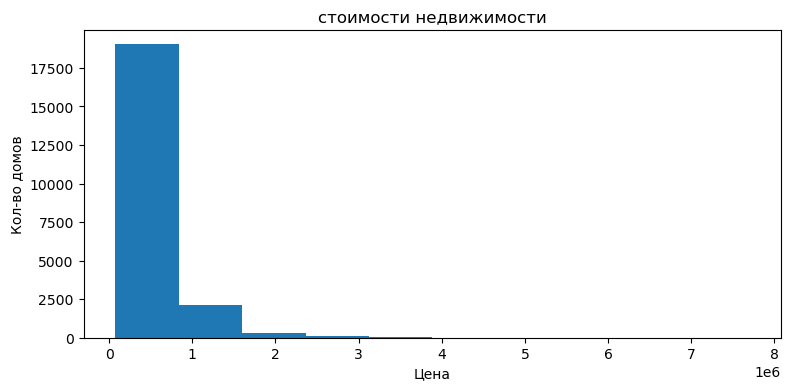

In [3]:
plt.figure(figsize=(9, 4))

plt.hist(df['price'], bins=10)

plt.title('стоимости недвижимости')

plt.xlabel('Цена')
plt.ylabel('Кол-во домов');


---

1.3 Изучите распределение квадратуры жилой

---

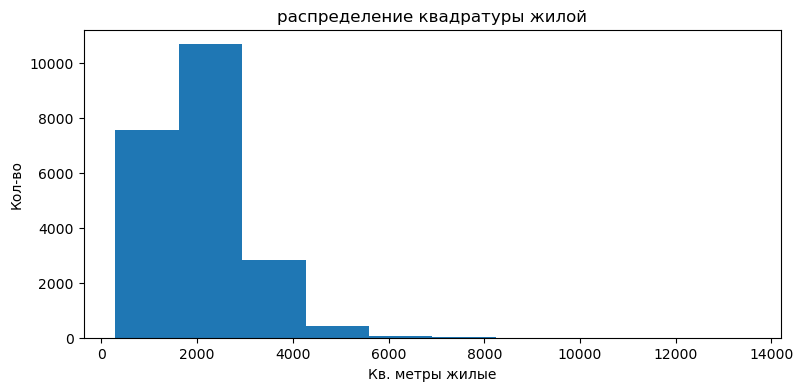

In [4]:
plt.figure(figsize=(9, 4))

plt.hist(df['sqft_living'], bins=10)

plt.title('распределение квадратуры жилой')
plt.ylabel('Кол-во')
plt.xlabel('Кв. метры жилые');

---

1.4 Изучите распределение года постройки

---

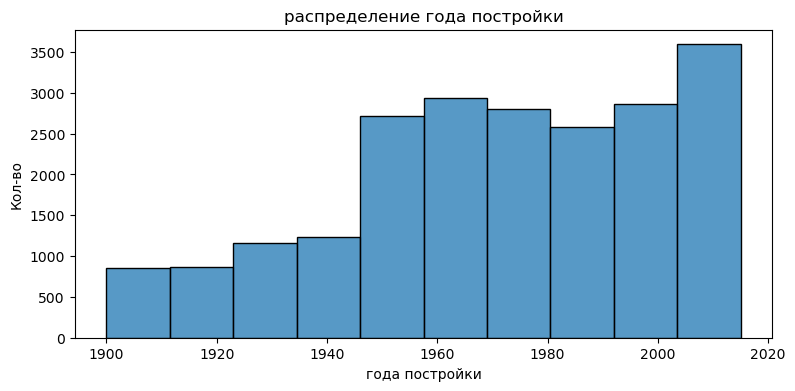

In [5]:
plt.figure(figsize=(9, 4))

#plt.hist(df['yr_built'], bins=10)
sns.histplot(df['yr_built'], bins=10)

plt.title('распределение года постройки')
plt.ylabel('Кол-во')
plt.xlabel('года постройки');

# Условие 2:
####  2 задача 

---

2.1 Изучите распределение домов от наличия вида на набережную
Постройте график Сделайте выводы

---

([<matplotlib.patches.Wedge at 0x1d4321468e0>,
 [Text(-1.0996912625289312, 0.026060067488889404, 'no'),
  Text(1.0996912610039797, -0.026060131839218025, 'yes')],
 [Text(-0.5998315977430533, 0.014214582266666945, '99.2%'),
  Text(0.5998315969112615, -0.014214617366846195, '0.8%')])

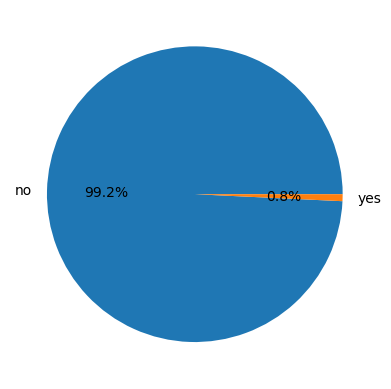

In [6]:
data= df['waterfront'].replace({0: 'no', 1: 'yes'}).value_counts()
names = data.index
val = data.values

plt.pie(data, autopct='%1.1f%%',labels=names)


# ИЛИ

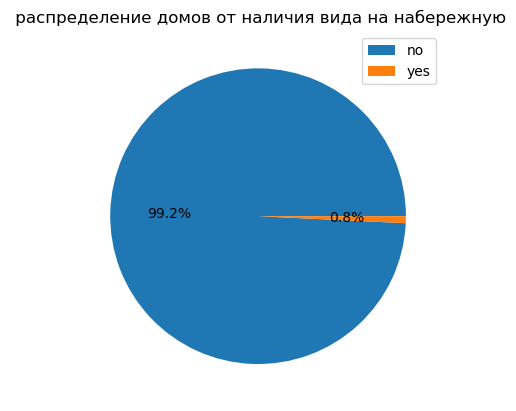

In [7]:
data = df['waterfront'].value_counts()
data.index = ['no', 'yes']
plt.pie(data, autopct='%1.1f%%')
plt.title(' распределение домов от наличия вида на набережную')
plt.legend(data.index);

---


2.2 Изучите распределение этажей домов

---

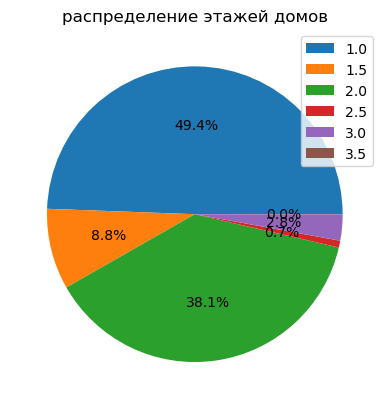

In [8]:
data = df['floors'].value_counts().sort_index()
plt.pie(data, autopct='%1.1f%%')
plt.title('распределение этажей домов')
plt.legend(data.index);

---


2.3 Изучите распределение состояния домов

---

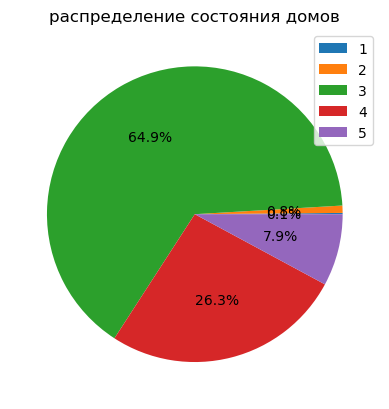

In [9]:
data = df['condition'].value_counts().sort_index()
plt.pie(data, autopct='%1.1f%%')
plt.title('распределение состояния домов')
plt.legend(data.index);

# Условие 3:
####  3 задача 

---

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

---

In [10]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix)< 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


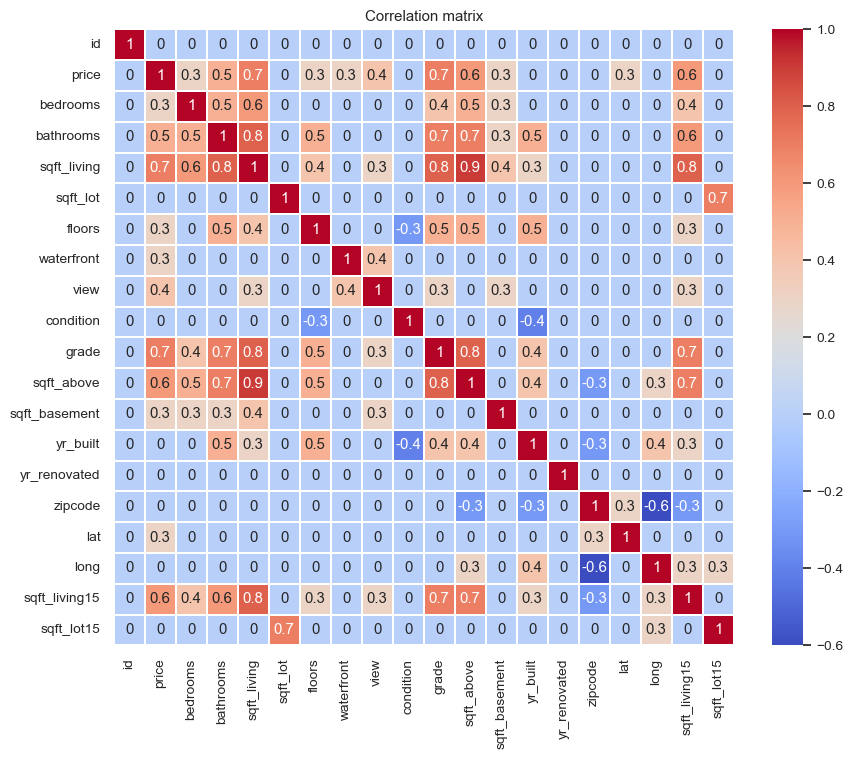

In [11]:
plt.figure(figsize=(10, 8))

sns.set(font_scale=0.9)

sns.heatmap(corr_matrix, annot=True, linewidths=.2, cmap='coolwarm')

plt.title('Correlation matrix');

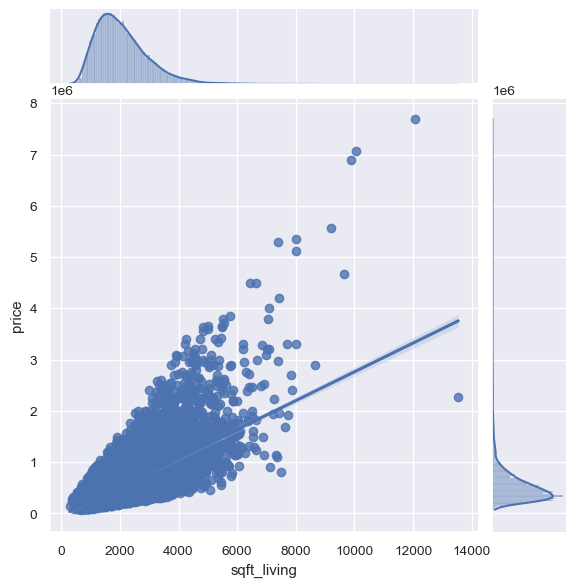

In [12]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg');

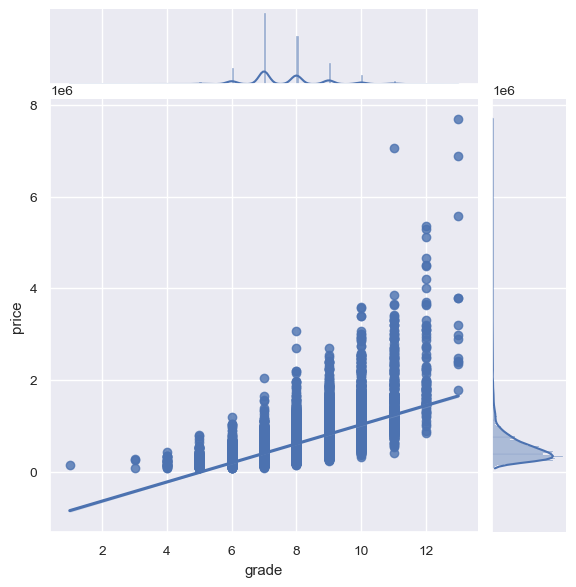

In [13]:
sns.jointplot(x=df['grade'], y=df['price'], kind='reg');

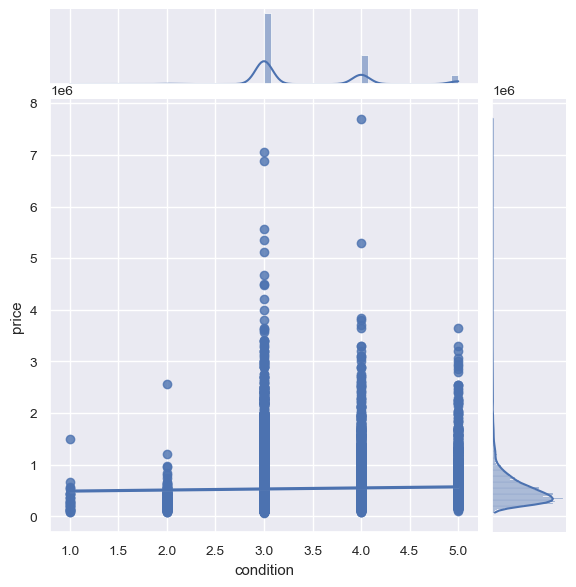

In [14]:
sns.jointplot(x=df['condition'], y=df['price'], kind='reg');

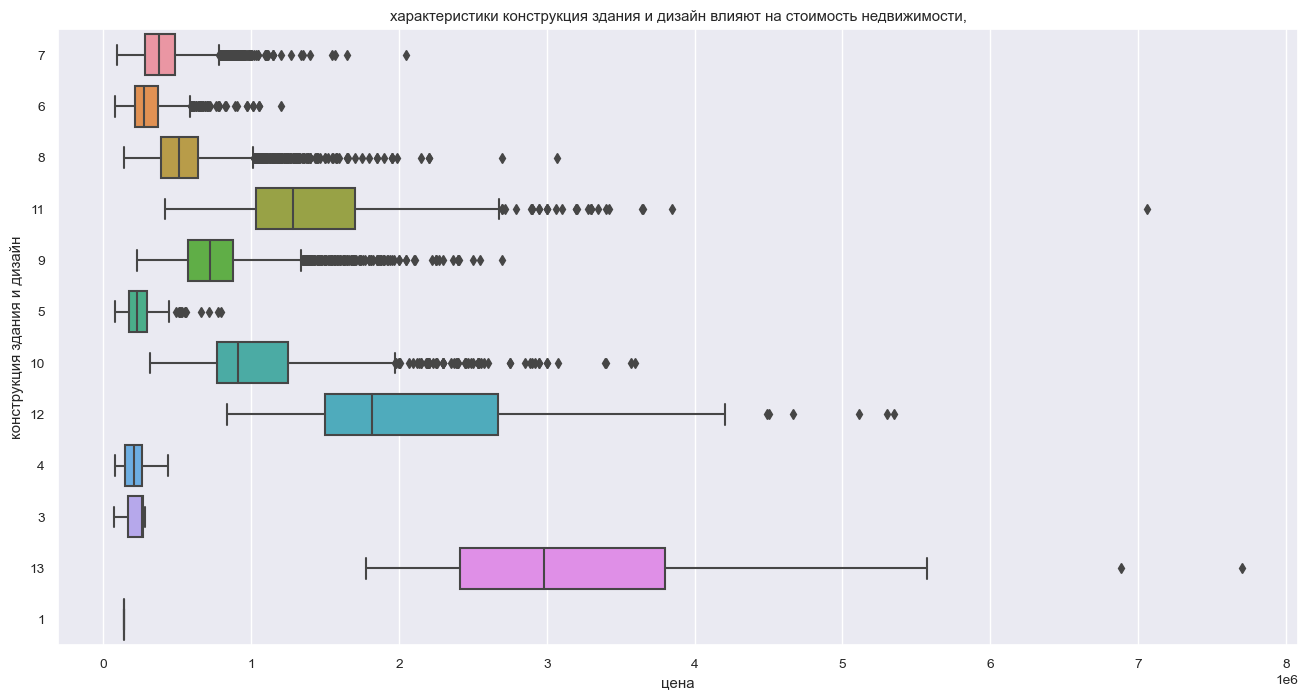

In [15]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5)

plt.xlabel('цена')
plt.ylabel('конструкция здания и дизайн')
plt.title('характеристики конструкция здания и дизайн влияют на стоимость недвижимости,');

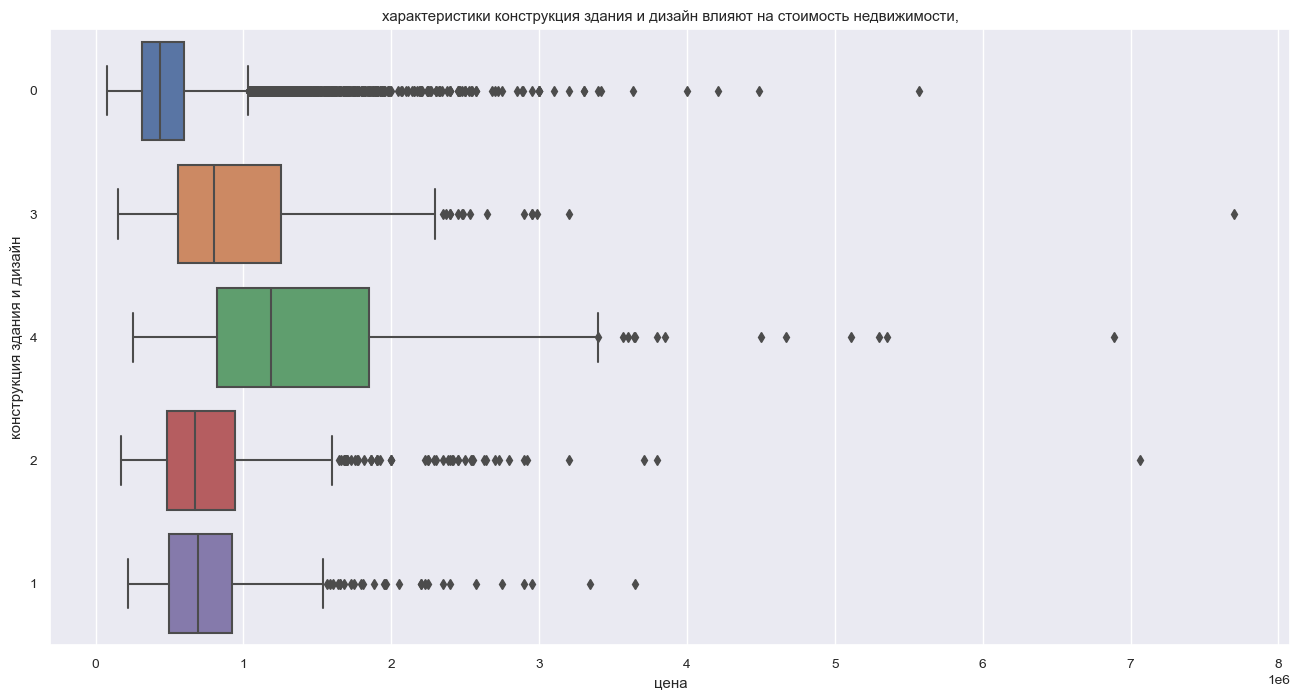

In [16]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5)

plt.xlabel('цена')
plt.ylabel('конструкция здания и дизайн')
plt.title('характеристики конструкция здания и дизайн влияют на стоимость недвижимости,');

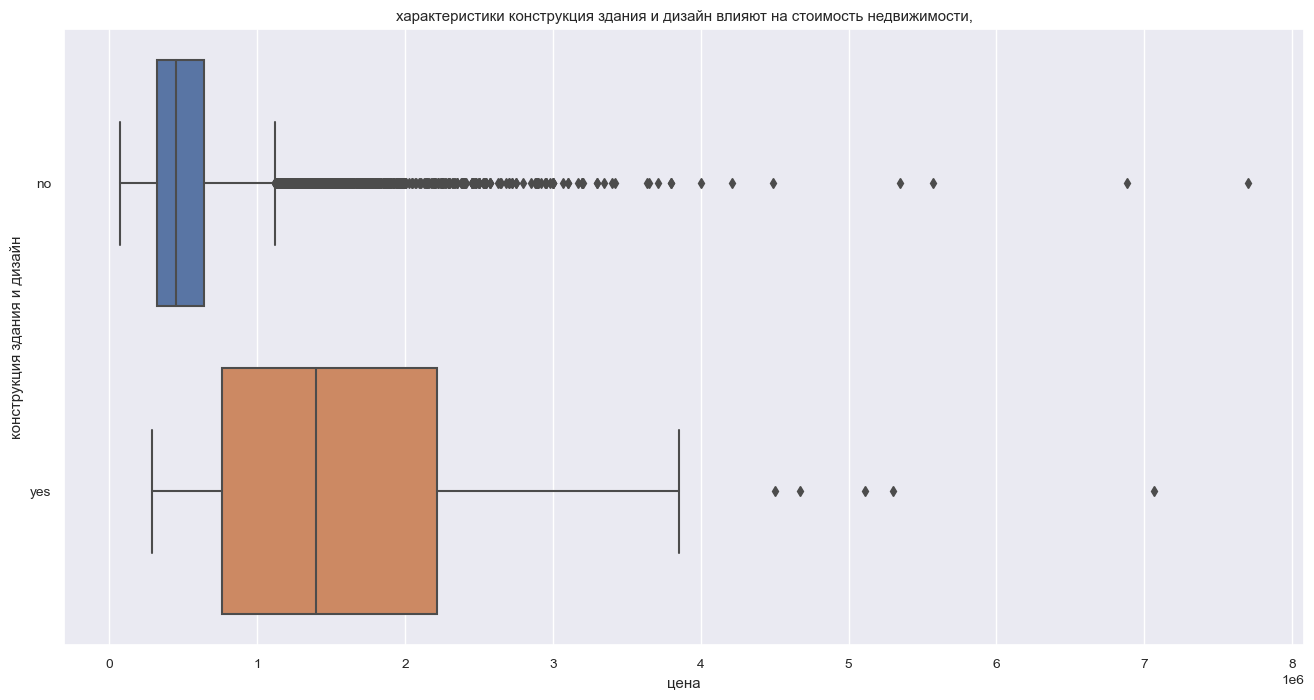

In [21]:
plt.figure(figsize=(16, 8))

sns.boxplot(x=df['price'], y=df['waterfront'].replace({0: 'no', 1: 'yes'}), whis=1.5)

plt.xlabel('цена')
plt.ylabel('конструкция здания и дизайн')
plt.title('характеристики конструкция здания и дизайн влияют на стоимость недвижимости,');